<a href="https://colab.research.google.com/github/NGONGOCHA/Project/blob/main/REALTOR/Realtor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>MÔ HÌNH DỰ ĐOÁN GIÁ NHÀ</h1>

# Các thư viện cần thiết

In [ ]:
from __future__ import print_function

# Tạo giao diện dự đoán
from ipywidgets import widgets
from IPython.display import display, clear_output
from IPython.display import Markdown as md

# Trực quan hoá dữ liệu
import seaborn as sns
sns.set_theme(palette="flare")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import sklearn
from datetime import datetime
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Mô tả dữ liệu

Crawl dữ liệu từ website realtor.com

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Phân tích dữ liệu lớn/Realtor/Bản sao của realtor-data.csv')

In [ ]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0


In [ ]:
df.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [ ]:
df.info

<bound method DataFrame.info of           status  bed  bath  acre_lot           city        state  zip_code  \
0       for_sale  3.0   2.0      0.12       Adjuntas  Puerto Rico     601.0   
1       for_sale  4.0   2.0      0.08       Adjuntas  Puerto Rico     601.0   
2       for_sale  2.0   1.0      0.15     Juana Diaz  Puerto Rico     795.0   
3       for_sale  4.0   2.0      0.10          Ponce  Puerto Rico     731.0   
4       for_sale  6.0   2.0      0.05       Mayaguez  Puerto Rico     680.0   
...          ...  ...   ...       ...            ...          ...       ...   
904961  for_sale  2.0   2.0       NaN  New York City     New York   10463.0   
904962  for_sale  2.0   2.0       NaN          Bronx     New York   10463.0   
904963  for_sale  NaN   1.0       NaN          Bronx     New York   10463.0   
904964  for_sale  3.0   2.0       NaN          Bronx     New York   10463.0   
904965  for_sale  3.0   3.0       NaN  New York City     New York   10463.0   

        house_size prev_sold_date     price  
0            920.0            NaN  105000.0  
1           1527.0            NaN   80000.0  
2            748.0            NaN   67000.0  
3           1800.0            NaN  145000.0  
4              NaN            NaN   65000.0  
...            ...            ...       ...  
904961         NaN     2021-08-13  359000.0  
904962      1200.0            NaN  299000.0  
904963         NaN            NaN  120000.0  
904964         NaN            NaN  449000.0  
904965      1677.0     2007-06-27  850000.0  

[904966 rows x 10 columns]>

In [ ]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,775126.000000,791082.000000,638324.000000,904762.000000,6.120800e+05,9.048950e+05
mean,3.332190,2.484236,17.317292,6519.464582,2.138437e+03,8.774382e+05
std,2.065312,1.931622,970.707378,3816.713093,3.046600e+03,2.457698e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,0.110000,2908.000000,1.132000e+03,2.685000e+05
50%,3.000000,2.000000,0.290000,6811.000000,1.650000e+03,4.750000e+05
75%,4.000000,3.000000,1.150000,8854.000000,2.495000e+03,8.300000e+05
max,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,8.750000e+08


In [ ]:
# Xoá những cột không cần thiết
df = df.drop(["status", "city", "prev_sold_date"], axis=1)

# Xoá những dòng null
df = df.dropna()
starting_length = len(df)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,bed,bath,acre_lot,state,zip_code,house_size,price
0,3.0,2.0,0.12,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Puerto Rico,731.0,1800.0,145000.0
4,4.0,3.0,0.46,Puerto Rico,612.0,2520.0,179000.0
...,...,...,...,...,...,...,...
413094,4.0,8.0,4.48,New York,10504.0,9000.0,5600000.0
413095,6.0,8.0,3.39,New York,10504.0,7584.0,3650000.0
413096,4.0,5.0,1.28,New York,10504.0,4280.0,2449000.0
413097,4.0,7.0,3.94,New York,10504.0,6806.0,4999999.0


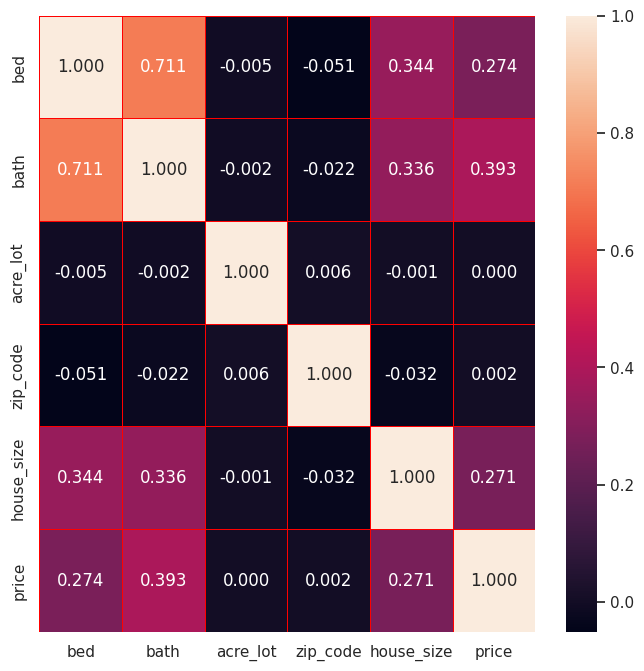

In [ ]:
df_filter = df.drop(columns=['state'])

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_filter.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.3f',ax=ax)
plt.show()

state
Massachusetts     103770
New Jersey         73503
Connecticut        66628
New York           44615
Rhode Island       24620
New Hampshire      24454
Maine              23010
Vermont            22205
Puerto Rico        15390
Pennsylvania       12849
Delaware            1707
Virgin Islands       342
Wyoming                3
West Virginia          3
Name: count, dtype: int64

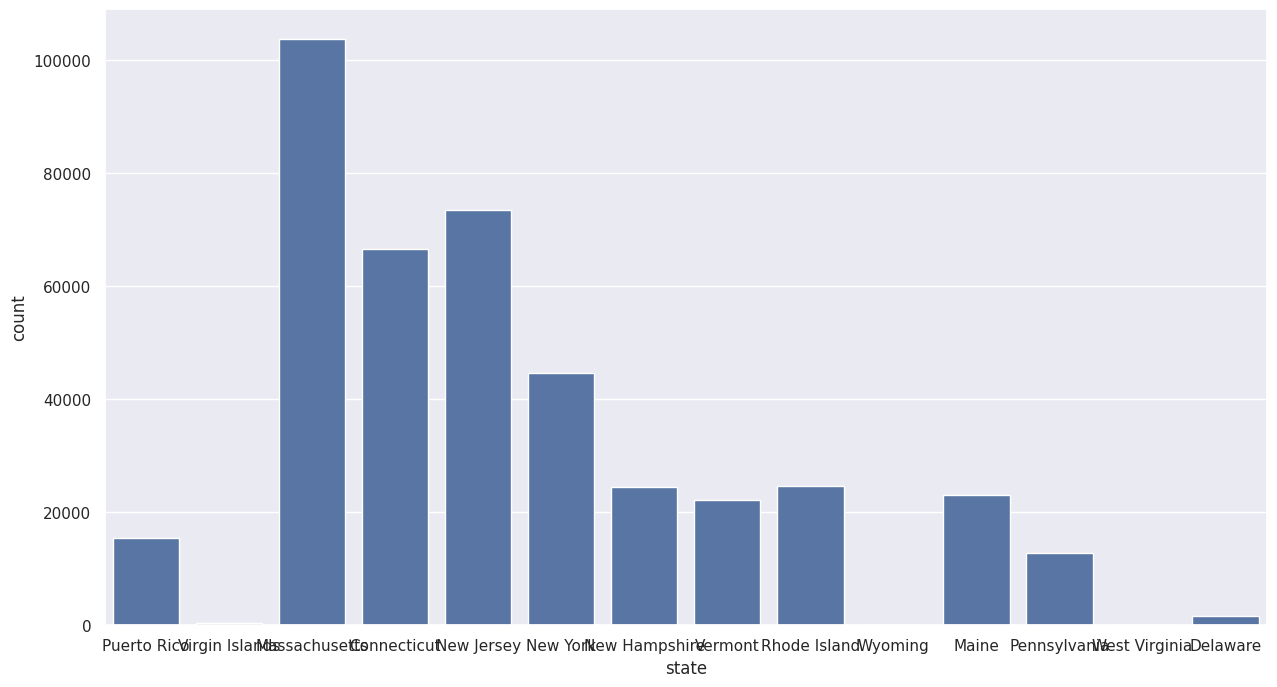

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="state", data=df)
df.loc[:,'state'].value_counts()

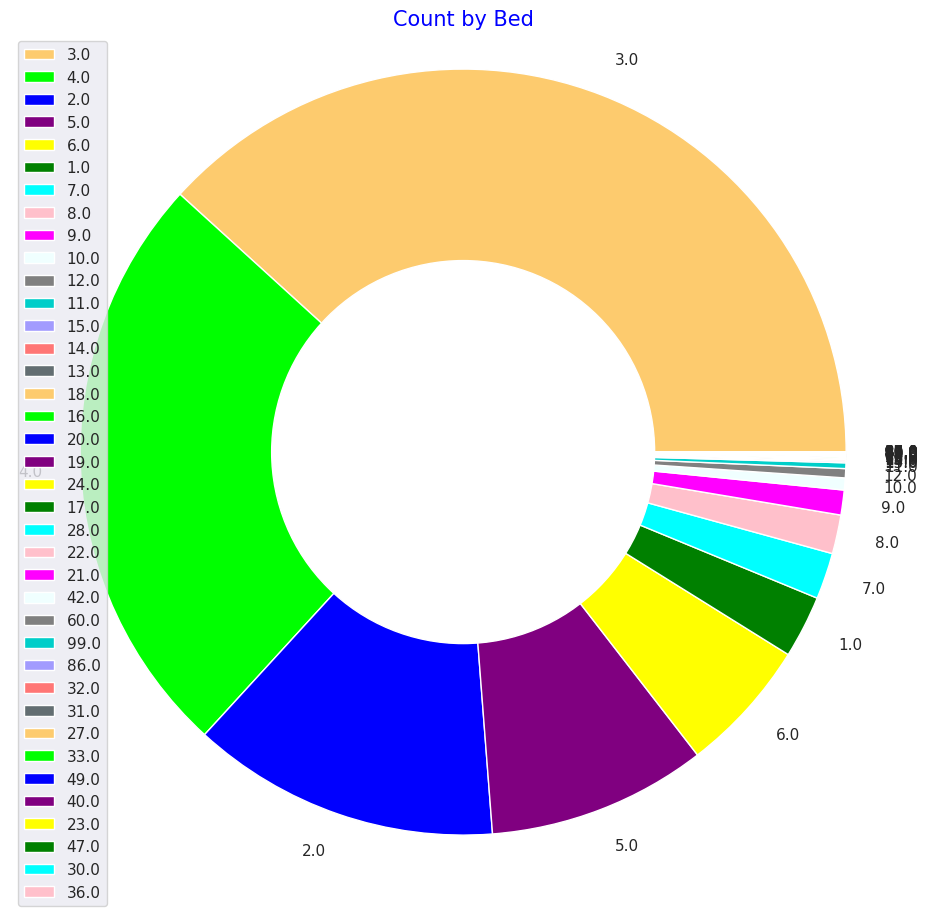

In [ ]:
df.bed.dropna(inplace = True)
labels = df.bed.value_counts().index
colors = ['#fdcb6e','lime','blue','purple','yellow','green','cyan','pink','magenta','azure','gray','#00cec9','#a29bfe','#ff7675','#636e72']
sizes = df.bed.value_counts().values
explode=np.zeros((len(df.bed.unique()),), dtype=int)
# visual
plt.figure(figsize = (10,10))
plt.title('Count by Bed',color = 'blue',fontsize = 15)
patches, texts = plt.pie(sizes,explode=explode, labels=labels, colors=colors)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

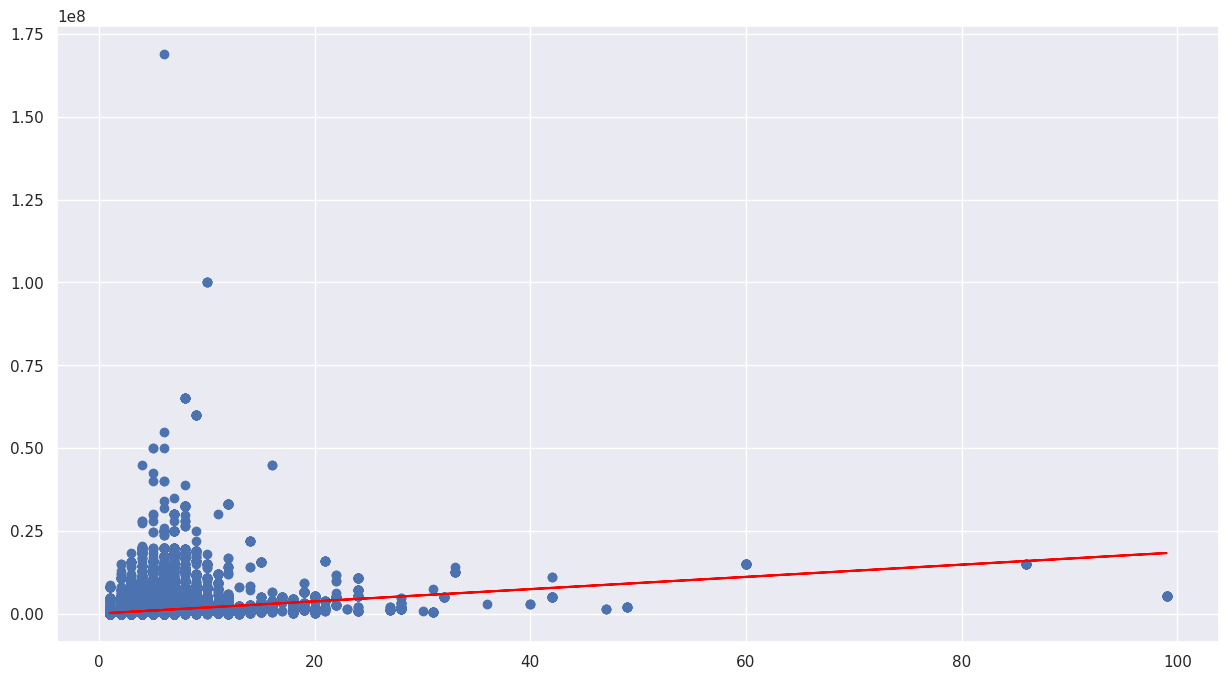

In [ ]:
x = df['bed'].values.reshape(-1,1)
y=df['price'].values.reshape(-1,1)
plt.scatter(x,y)

linear_reg.fit(x, y)

y_head=linear_reg.predict(x)
plt.plot(x,y_head,color='red')
plt.show()

In [ ]:
fiyat1=linear_reg.predict([[8]])
fiyat1

array([[1546762.42851473]])

In [ ]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.07488519765520307


# Multiple Linear Regression

In [ ]:
df=df[df['bed']!=0]
df

,bed,bath,acre_lot,state,zip_code,house_size,price
0,3.0,2.0,0.12,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Puerto Rico,731.0,1800.0,145000.0
4,4.0,3.0,0.46,Puerto Rico,612.0,2520.0,179000.0
...,...,...,...,...,...,...,...
413094,4.0,8.0,4.48,New York,10504.0,9000.0,5600000.0
413095,6.0,8.0,3.39,New York,10504.0,7584.0,3650000.0
413096,4.0,5.0,1.28,New York,10504.0,4280.0,2449000.0
413097,4.0,7.0,3.94,New York,10504.0,6806.0,4999999.0


In [ ]:
df_num = ['bed','bath','acre_lot','house_size']

In [ ]:
multi_linear_reg = LinearRegression()
df2 = df[df_num]
x = df2.values
y = df['price'].values.reshape(-1,1)

multi_linear_reg.fit(x, y)
b0_= multi_linear_reg.intercept_
print('b0_, điểm cắt của đường thẳng với trục y', b0_)

b0_, điểm cắt của đường thẳng với trục y [61106.92993283]


In [ ]:
coefs = multi_linear_reg.coef_
print('b1,b2', coefs)

b1,b2 [[-3.15479439e+04  2.45162281e+05  2.18802968e+00  7.19471090e+01]]


In [ ]:
df2

,bed,bath,acre_lot,house_size
0,3.0,2.0,0.12,920.0
1,4.0,2.0,0.08,1527.0
2,2.0,1.0,0.15,748.0
3,4.0,2.0,0.10,1800.0
4,4.0,3.0,0.46,2520.0
...,...,...,...,...
413094,4.0,8.0,4.48,9000.0
413095,6.0,8.0,3.39,7584.0
413096,4.0,5.0,1.28,4280.0
413097,4.0,7.0,3.94,6806.0


In [ ]:
ev1=[8,5,0.5,500]
fiyat=multi_linear_reg.predict([ev1])
fiyat

array([[1070509.43141568]])

In [ ]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.07488519765520307


# Polynomial Regression

In [ ]:
df.sort_values(by=['acre_lot'])

,bed,bath,acre_lot,state,zip_code,house_size,price
47399,2.0,1.0,0.0,Massachusetts,1876.0,996.0,385000.0
381469,2.0,2.0,0.0,New Jersey,8901.0,1219.0,539999.0
381789,2.0,1.0,0.0,New Jersey,8837.0,958.0,279900.0
381489,2.0,3.0,0.0,New Jersey,8820.0,1431.0,375000.0
381492,2.0,2.0,0.0,New Jersey,8820.0,1056.0,339900.0
...,...,...,...,...,...,...,...
10642,4.0,4.0,100000.0,Puerto Rico,926.0,3300.0,585000.0
217377,2.0,1.0,100000.0,New York,12887.0,1352.0,129000.0
219046,2.0,1.0,100000.0,New York,12887.0,1352.0,129000.0
219397,2.0,1.0,100000.0,New York,12887.0,1352.0,129000.0


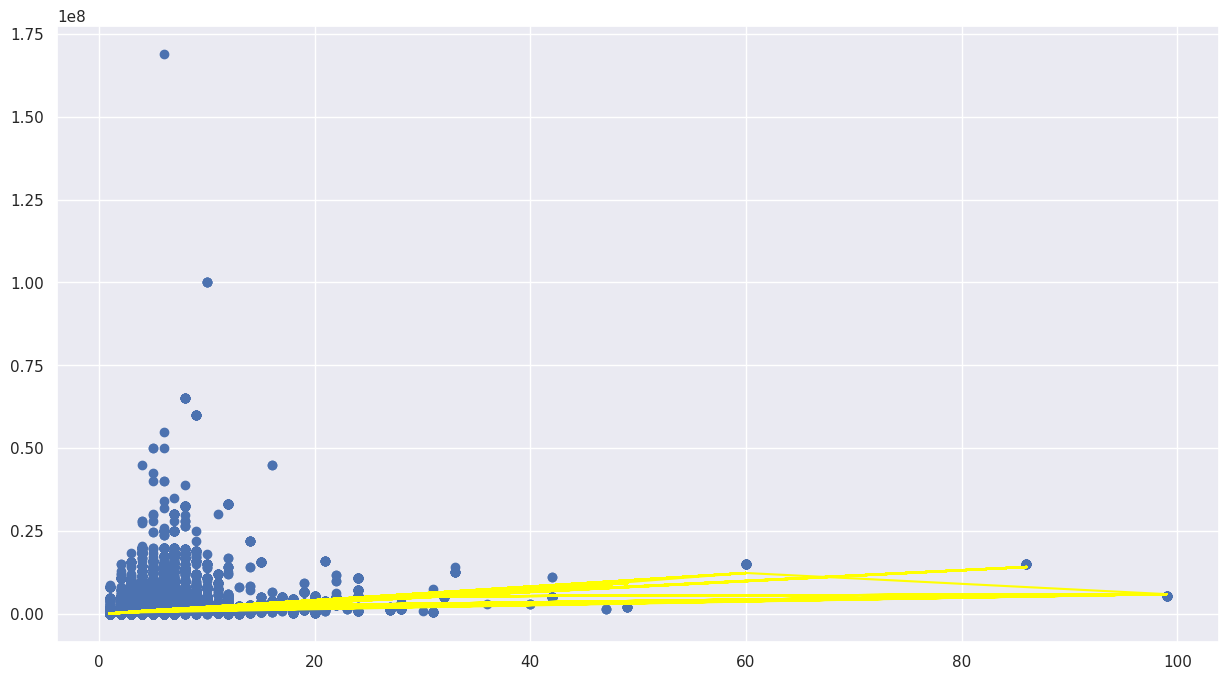

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x=df['bed'].values.reshape(-1,1)
y=df['price'].values.reshape(-1,1)
plt.scatter(x, y)
polynomial_regression=PolynomialFeatures(degree=4)
x_polynomial=polynomial_regression.fit_transform(x)
lr=LinearRegression()
lr.fit(x_polynomial,y)
y_head=lr.predict(x_polynomial)
plt.plot(x,y_head,color='yellow')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.08085404731360413


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
x = df['acre_lot'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [ ]:
treerig=DecisionTreeRegressor() #random state=0
treerig.fit(x,y)

DecisionTreeRegressor()

In [ ]:
print(treerig.predict([[6]]))

[504307.39590444]


<ipython-input-31-e88c341def51>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_=np.arange(min(x),max(x)).reshape(-1,1)


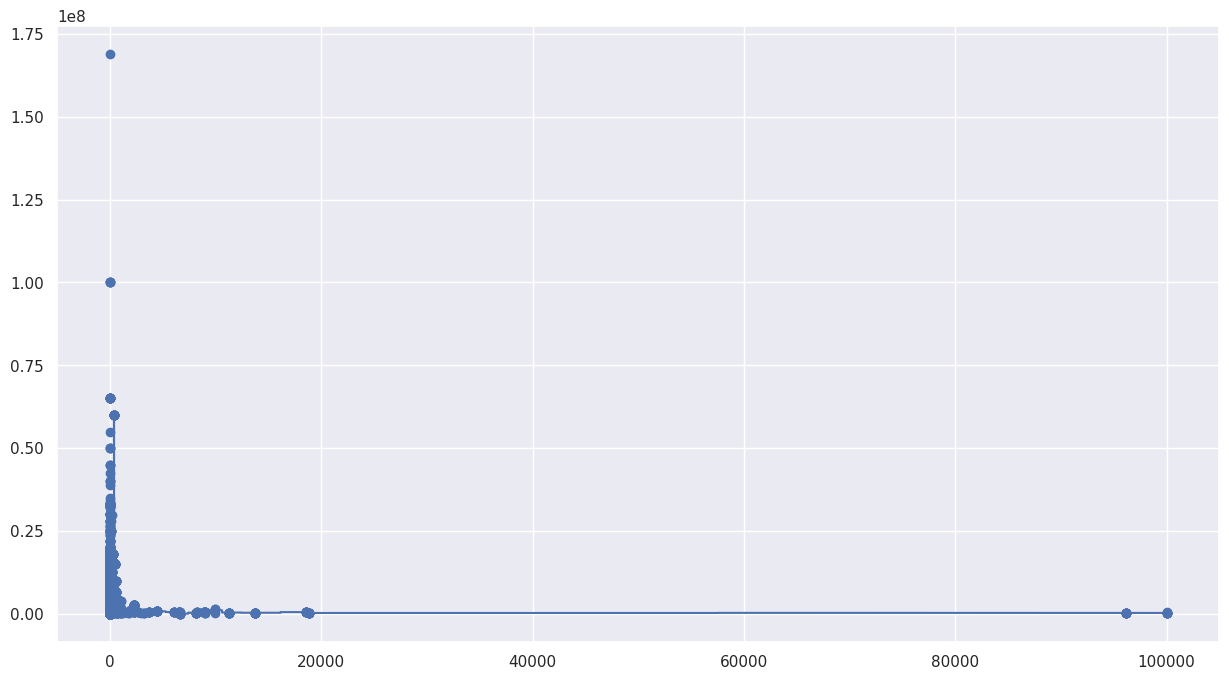

In [ ]:
x_=np.arange(min(x),max(x)).reshape(-1,1)
y_head=treerig.predict(x_)

plt.scatter(x, y)
plt.plot(x_,y_head)

plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x=df['house_size'].values.reshape(-1,1)
y=df['price'].values.reshape(-1,1)

In [ ]:
rf=RandomForestRegressor(n_estimators=100,random_state=42) #random state=0
rf.fit(x,y.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
x_=np.arange(min(x),max(x)).reshape(-1,1)
y_head=rf.predict(x)

<ipython-input-34-29881bb4abe8>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_=np.arange(min(x),max(x)).reshape(-1,1)


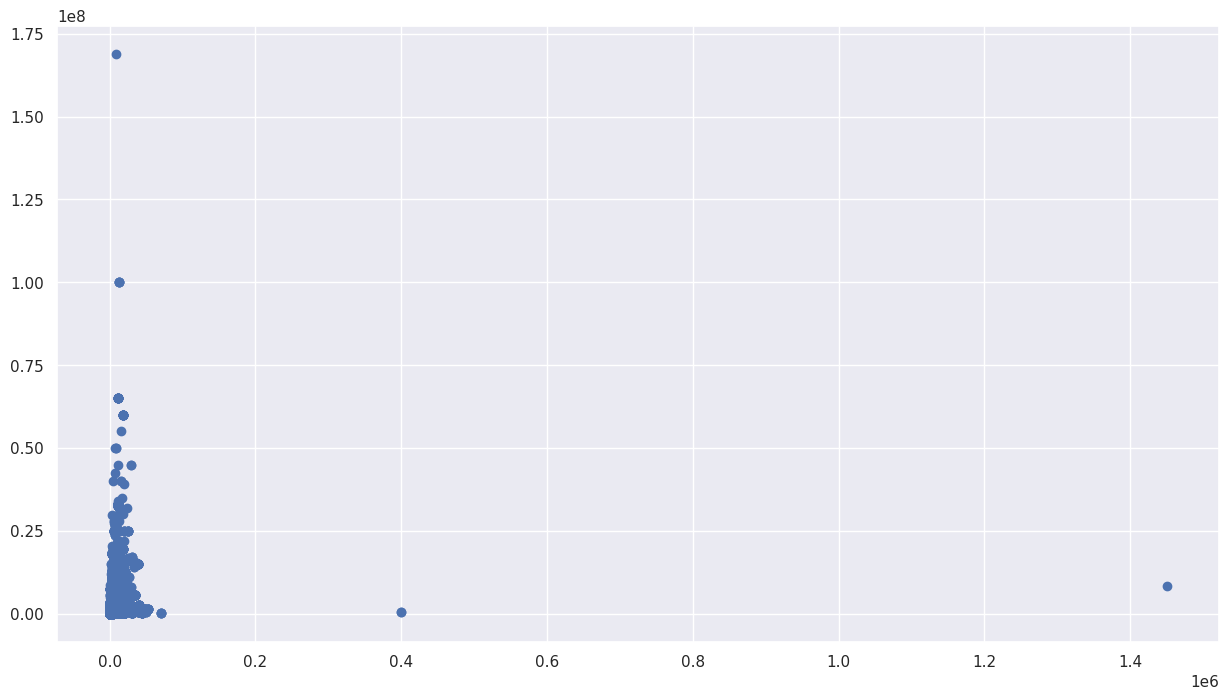

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.7308266536779834


MÔ HÌNH DỰ ĐOÁN

In [ ]:
X = df.drop(["price","state"], axis=1)
y = df["price"]

In [ ]:
df

,bed,bath,acre_lot,state,zip_code,house_size,price
0,3.0,2.0,0.12,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Puerto Rico,731.0,1800.0,145000.0
4,4.0,3.0,0.46,Puerto Rico,612.0,2520.0,179000.0
...,...,...,...,...,...,...,...
413094,4.0,8.0,4.48,New York,10504.0,9000.0,5600000.0
413095,6.0,8.0,3.39,New York,10504.0,7584.0,3650000.0
413096,4.0,5.0,1.28,New York,10504.0,4280.0,2449000.0
413097,4.0,7.0,3.94,New York,10504.0,6806.0,4999999.0


In [ ]:
def get_mi_score(X,y):
    X = X
    disc_feat = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mut_info_score = mutual_info_regression(X,y,discrete_features=disc_feat, random_state=42)
    mut_info_score = pd.Series(mut_info_score,name="Mutual Information Score",index=X.columns)
    mut_info_score = mut_info_score.sort_values(ascending=False)
    return mut_info_score

mut_info_score = get_mi_score(X,y)

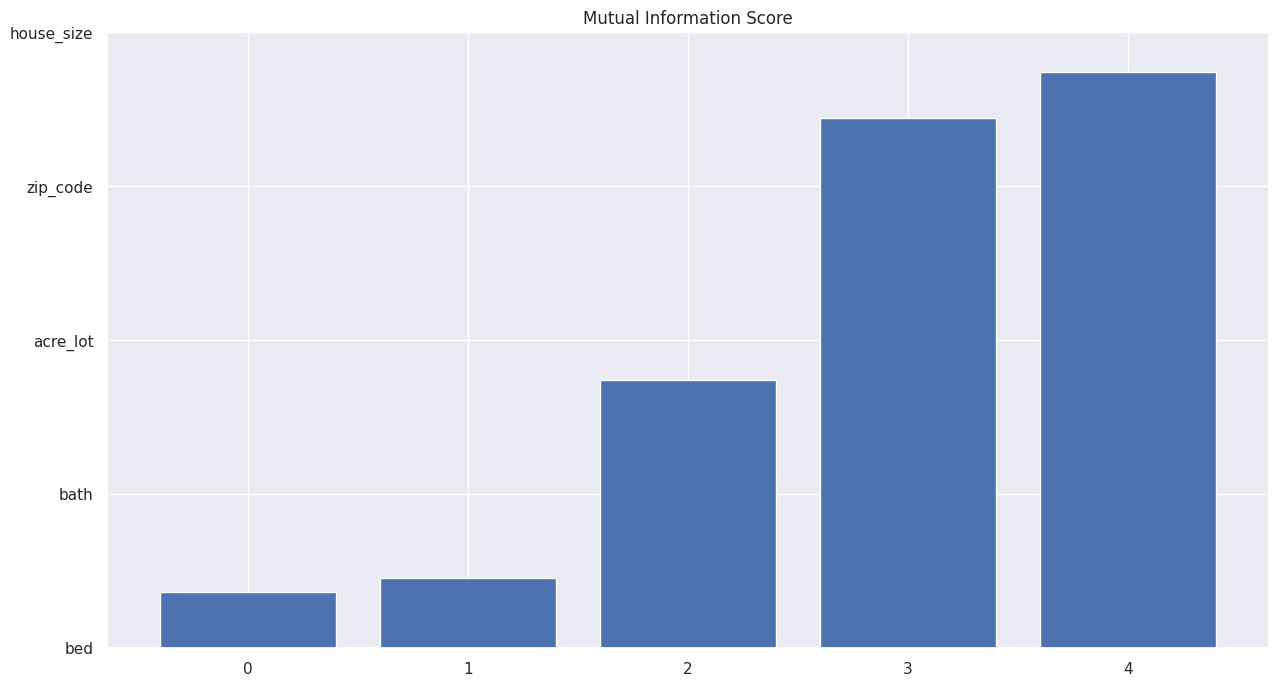

In [ ]:
def plot_score(score):
    score = score.sort_values(ascending = True)
    height = np.arange(len(score))
    ticks = list(score.index)
    plt.bar(height,score)
    plt.yticks(height,ticks)
    plt.title('Mutual Information Score')

plot_score(mut_info_score)

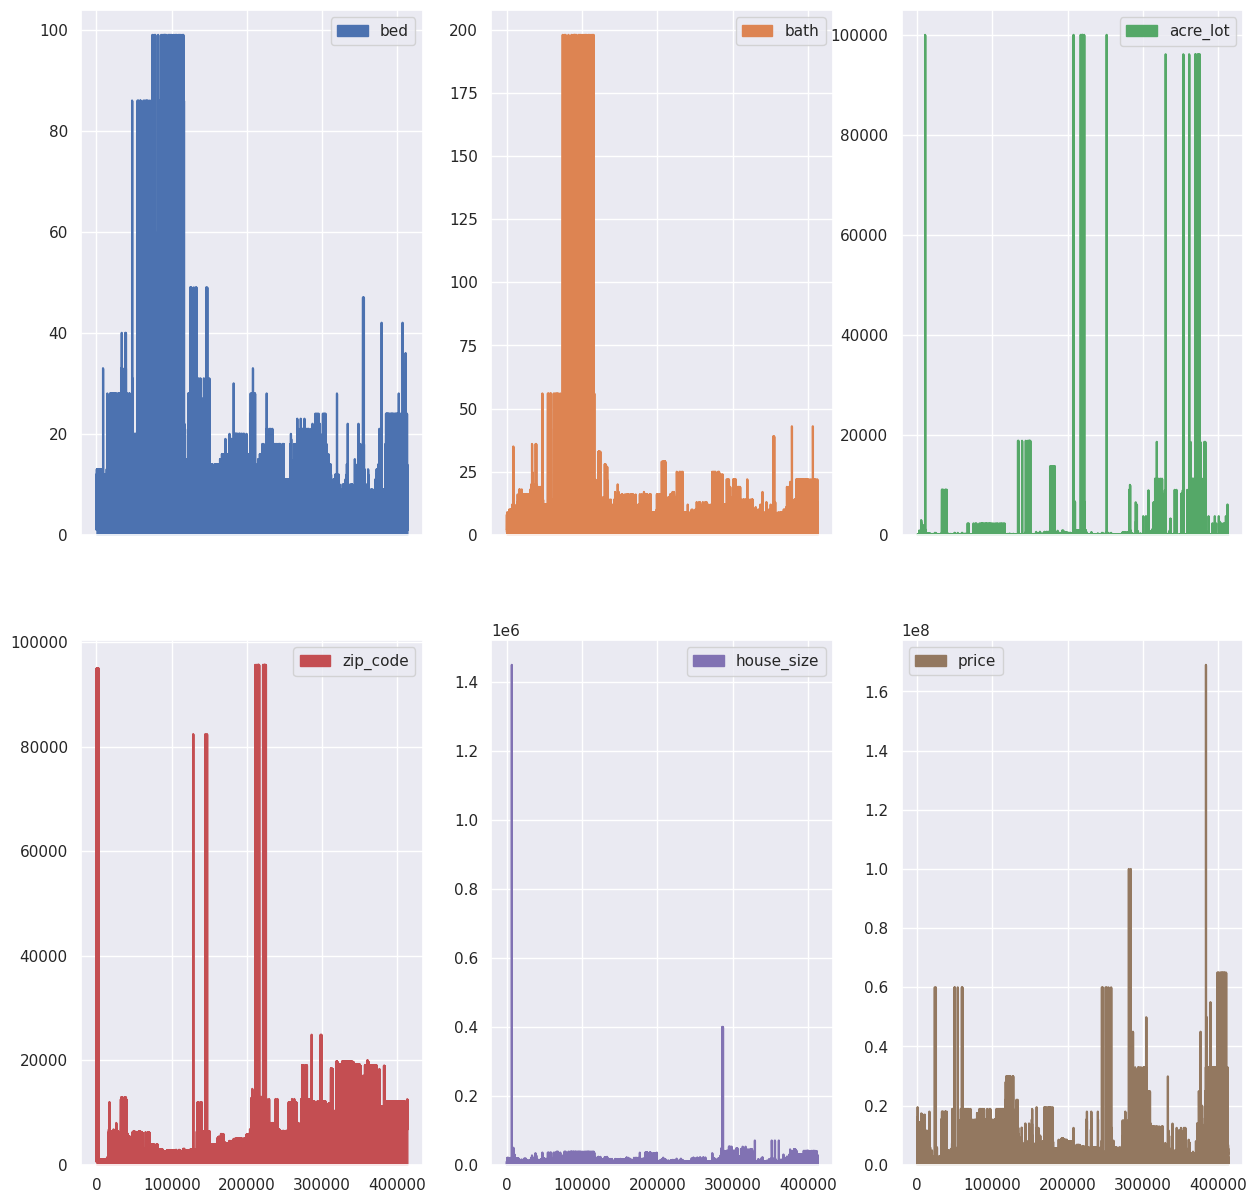

In [ ]:
df.plot.area(subplots=True, layout=(2,3), figsize=(15,15));

In [ ]:
z = np.abs(stats.zscore(df[["price", "house_size", "zip_code", "acre_lot", "bath", "bed"]]))

In [ ]:
df = df[(z<3).all(axis=1)]

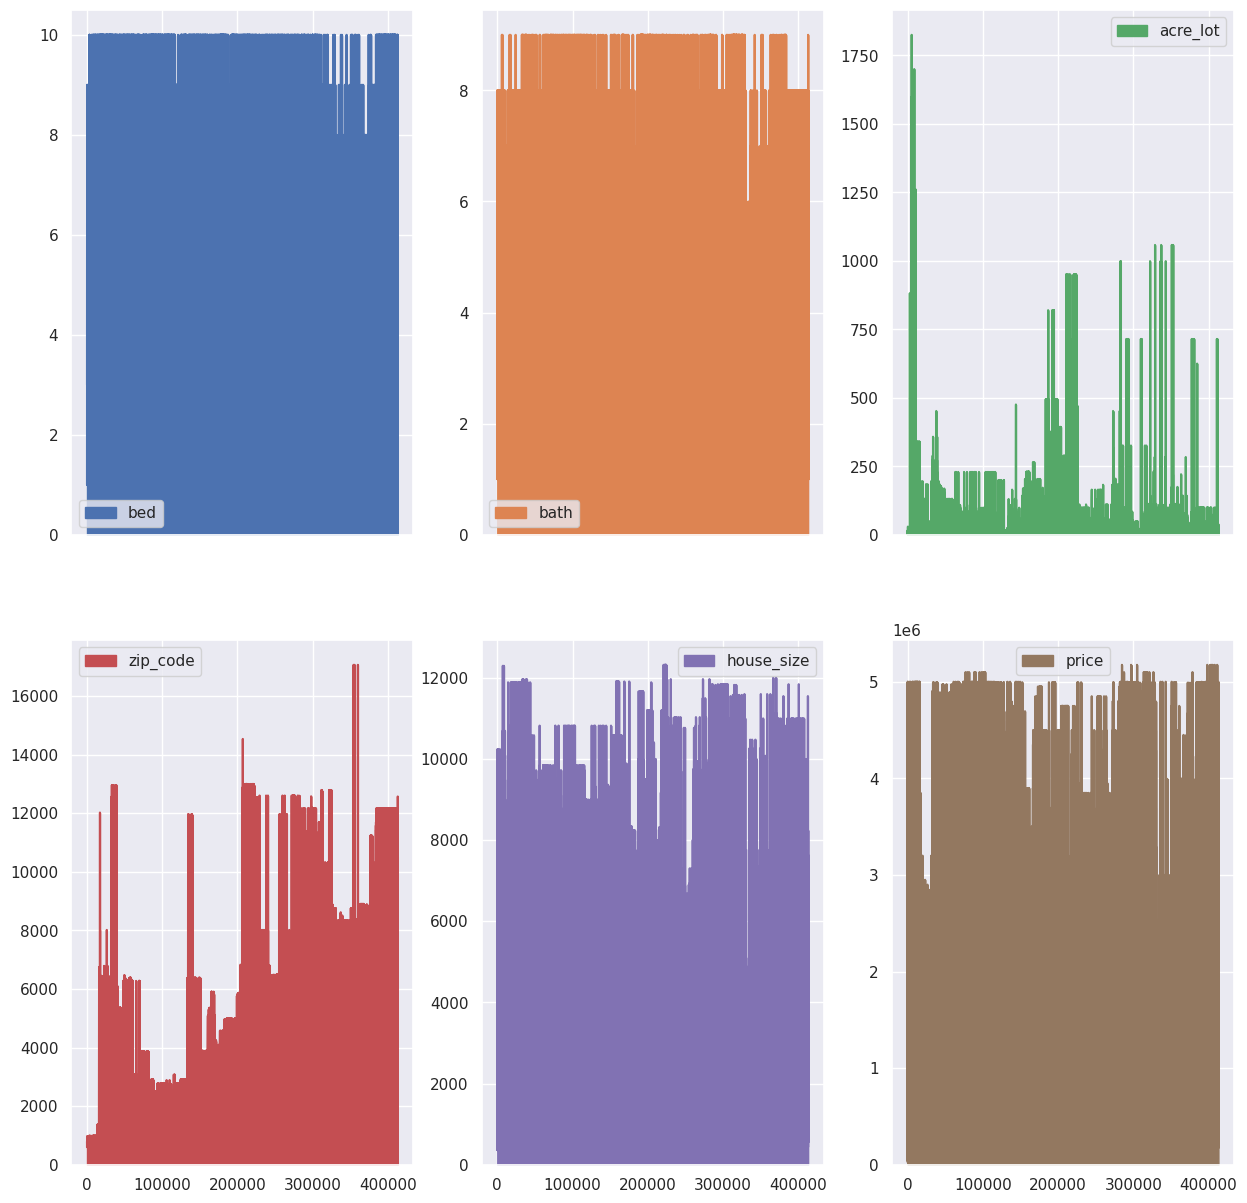

In [ ]:
df.plot.area(subplots=True, layout=(2,3), figsize=(15,15));

In [ ]:
# Print Starting Length of DataFrame
print("Remember that we started with", starting_length, "entries.")

Remember that we started with 413099 entries.


In [ ]:
# Print Ending Length of DataFrame
ending_length = len(df)
print("Sau khi loại bỏ bớt, còn lại", ending_length, "entries.")
print("Nghĩa là trong quá trình cập nhật, đã xoá đi", starting_length-ending_length, "entries")

Sau khi loại bỏ bớt, còn lại 387063 entries.
Nghĩa là trong quá trình cập nhật, đã xoá đi 26036 entries


In [ ]:
X = df.drop(["price", "state"], axis = 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

np.random.seed(42)

model = RandomForestRegressor()
model.fit(X_train.values, y_train)

model_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, model_pred)
r2 = r2_score(y_test, model_pred)
r2_percent = r2*100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
print(f"Độ chính xác dự đoán giá đã được niêm yết là: {r2_percent:.2f}%")
print(f"Trung bình, mô hình dự đoán giá này giảm $ {mae:.2f} so với mức định giá niêm yết.")

Độ chính xác dự đoán giá đã được niêm yết là: 98.75%
Trung bình, mô hình dự đoán giá này giảm $ 9346.77 so với mức định giá niêm yết.


<hr style="border:2px solid; color:#CB5C29">

In [ ]:
bed = widgets.Text(description = "Bedrooms")
bath = widgets.Text(description = "Bathrooms")
acre = widgets.Text(description = "Acres")
zip_code = widgets.Text(description = "Zip Code")
house_size = widgets.Text(description = "House Sqft")

submit_button = widgets.Button(
    description='Predict Price',
    disabled=False,
    button_style='success',
    tooltip='Get Predicted Listing Price',
    icon='check'
)

result = widgets.Output()

In [ ]:
def on_button_clicked(b):
    with result:
        clear_output()
        predict_listing_price()

submit_button.on_click(on_button_clicked)

In [ ]:
def predict_listing_price():

    bed_val = bed.value
    bath_val = bath.value
    acre_val = acre.value
    zip_code_val = zip_code.value
    house_size_val = house_size.value

    print("Đối với 1 ngôi nhà có các giá trị sau:")
    print("Bed:", bed_val)
    print("Bath:", bath_val)
    print("Acres:", acre_val)
    print("Zip Code:", zip_code_val)
    print("House Size in Square Feet:", house_size_val)

    df_pred = pd.DataFrame([pd.Series([bed_val, bath_val, acre_val, zip_code_val, house_size_val])])

    prediction = model.predict(df_pred)
    pred_int = int(prediction+60000)

    print()
    print(f'Giá dự đoán sẽ là: ${pred_int:.2f}')

    over_pred = pred_int + mae +60000
    under_pred = pred_int - mae -60000
    print()
    print(f'Độ lệch trung bình tuyệt đối: ${mae:.2f},')
    print(f'Mô hình đề xuất một phạm vi Giá để Niêm yết là: ${under_pred:.2f}-${over_pred:.2f}')

In [ ]:
# Display Form
display(bed, bath, acre, zip_code, house_size)
print()

# Display the Submit Button
display(submit_button, result)

Text(value='', description='Bedrooms')

Text(value='', description='Bathrooms')

Text(value='', description='Acres')

Text(value='', description='Zip Code')

Text(value='', description='House Sqft')

Button(button_style='success', description='Predict Price', icon='check', style=ButtonStyle(), tooltip='Get Pr…

Output()